# ¡Un repaso rápido!

# ¿Qué es **Hadoop**?


**Apache™ Hadoop®** es un proyecto de software de **código abierto** que se puede utilizar para **procesar** de forma eficaz **conjuntos de datos de gran tamaño**. En lugar de utilizar un equipo grande para procesar y almacenar los datos, Hadoop facilita la creación de **clústeres de hardware** de consumo para **analizar conjuntos de datos masivos en paralelo**.

El **ecosistema de Hadoop** contiene **numerosas aplicaciones** y motores de ejecución, lo que aporta una **variedad de herramientas** para satisfacer las necesidades de sus **cargas de trabajo de análisis**.

![](https://devveri.com/wp-content/uploads/2013/12/YARN.png)


## ¿Qué es **HDFS**?

**HDFS** (**Hadoop Distributed File System**) es el componente de la arquitectura de Hadoop que **se encarga de distribuir** grandes cantidades de datos en un cluster.

![data store](http://csis.pace.edu/~marchese/CS865/Lectures/Chap7/Chapter7fin_files/image002.jpg)

![](https://hadoop.apache.org/docs/stable/hadoop-project-dist/hadoop-hdfs/images/hdfsarchitecture.png)

## ¿Qué es **YARN**?

**Yet Another Resource Negotiator** (**YARN**) se encarga de la **administración de recursos**. YARN **supervisa todos los recursos de su clúster** y se asegura de que se asignen de forma **dinámica** a fin de completar las tareas del trabajo de procesamiento. YARN puede administrar cargas de trabajo de Hadoop MapReduce, además de otros marcos distribuidos como Apache Spark, Apache Tez y más.

**Proceso de una llamada YARN:**

- Cliente envía el trabajo: La aplicación envía una solicitud al ResourceManager, el componente principal de YARN que administra los recursos del clúster.

- YARN asigna recursos: El ResourceManager revisa los recursos disponibles y asigna contenedores en los nodos del clúster, donde se ejecutarán las tareas. El ApplicationMaster se encarga de coordinar la ejecución de ese trabajo.

- NodeManager ejecuta tareas: Cada NodeManager (nodo) ejecuta las tareas asignadas dentro de los contenedores y reporta el estado de esas tareas al ApplicationMaster.

- Finalización del trabajo: Una vez completadas las tareas, los contenedores son liberados y YARN actualiza el estado del trabajo al cliente.

![](https://www.oreilly.com/api/v2/epubs/9781491901687/files/images/hddg_0402.png)

## ¿Qué es **Map Reduce**?

**MapReduce Architecture** es un **modelo** de programación y un **marco de software** utilizado para preparar grandes cantidades de datos. El programa MapReduce funciona en **dos etapas**, para ser específicos: **Map y Reduce**. Las solicitudes de mapa se organizan con el mapeo y la división de datos. Después, las tareas de reducción reducen y mezclan los datos.

**Proceso de una llamada MapReduce:**

- Cliente envía el trabajo: El usuario ejecuta un comando para iniciar un trabajo de MapReduce. Este comando envía el trabajo a YARN (a través del ResourceManager) para gestionar la asignación de recursos.

- Fase Map: Los datos de entrada se dividen en bloques y se distribuyen entre varios nodos.
Cada nodo ejecuta la función Map, que procesa los datos en paralelo, produciendo pares clave-valor intermedios.

- Shuffle & Sort: Los pares clave-valor generados por los mappers se agrupan y ordenan por clave para ser enviados a los reducers.

- Fase Reduce: Los nodos ejecutan la función Reduce, que toma las claves y los valores asociados, y los procesa para generar el resultado final.
Finalización del trabajo: El resultado final es escrito en el sistema de archivos distribuido (HDFS), y el cliente es notificado de la finalización del trabajo.

![](https://media.geeksforgeeks.org/wp-content/cdn-uploads/20200908123810/MapReduce-Architecture.jpg)




# Entonces... **Montemos un Cluster de Hadoop en la nube**!

¿Todavía dudamos de que esto sea necesario? =>[Video Amazon Elastic MapReduce](https://www.youtube.com/watch?v=S6Ja55n-o0M)

Primero, es importante  saber que la idea de armar nuestro cluster Hadoop en la **nube**, es **liberarnos de nuestros set ups locales** y **aprender a utilizar los servicios aprovisionados en la nube**.

Al fin y al cabo, muy pocas veces tendremos que trabajar en equipos locales y con data ubicada localmente en nuestro equipo. Lo normal, y cada vez más, será que la información esté en la nube, bien nube pública como AWS, Google Cloud, Microsoft Azure... o bien en una nube privada de la empresa.

Trabajar en la nube **tiene un costo** (en local también) pero como hemos visto, todas las plataformas nos ofrecen planes gratuitos o trial. El más conveniente a día de hoy es Google Cloud, que nos ofrece 300 USD para gastar en 3 meses en lo que quieras dentro de la plataforma, sin limitaciones más allá del presupuesto. Otros proveedores te dan menos tiempo o menos créditos.

# Al turrón!

Lo primero es tener créditos en la cuenta de Google (espero que no los hayáis gastado ya, sino, siempre nos podemos crear otra cuenta!)

1- Vamos a la **Google Cloud** https://console.cloud.google.com/ y en el menú buscamos **Dataproc**

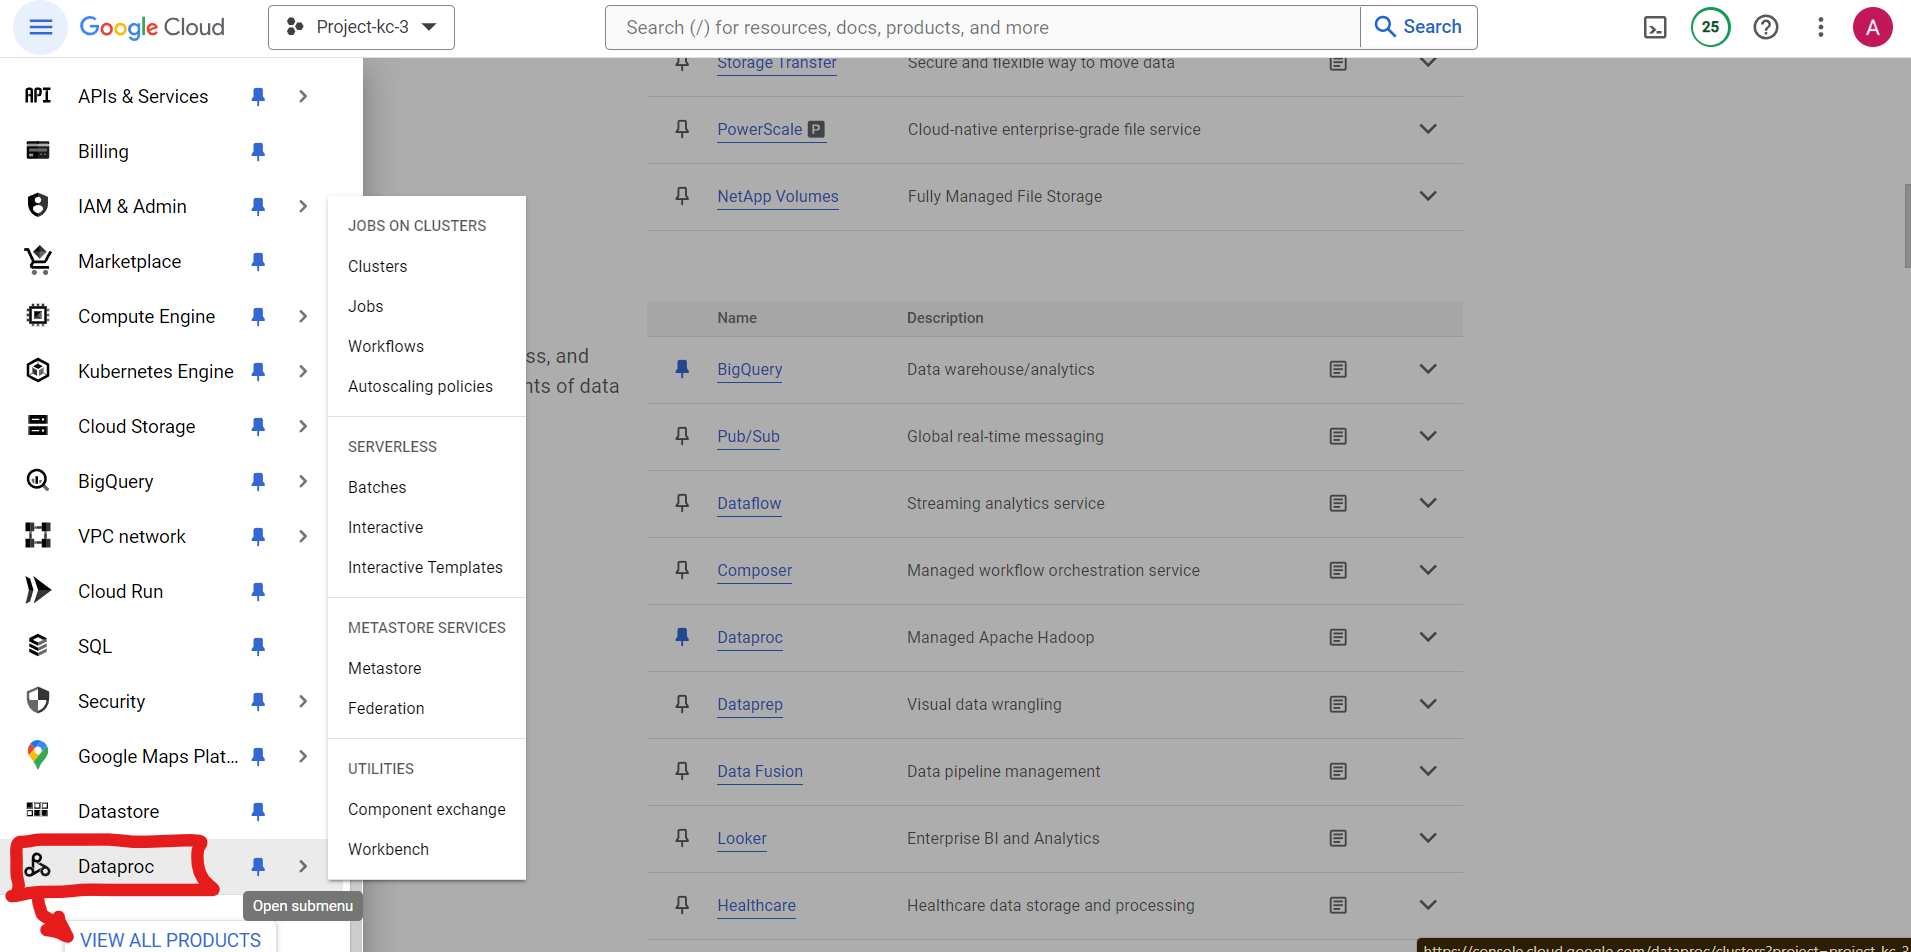

**!!** Si no aparece en el menú, vamos a **"VIEW ALL PRODUCTS"** y en **Analytics**, al igual que BigQuery, lo podemos encontrar y pinear al menú principal.

2- Hacemos click en **Cluster**

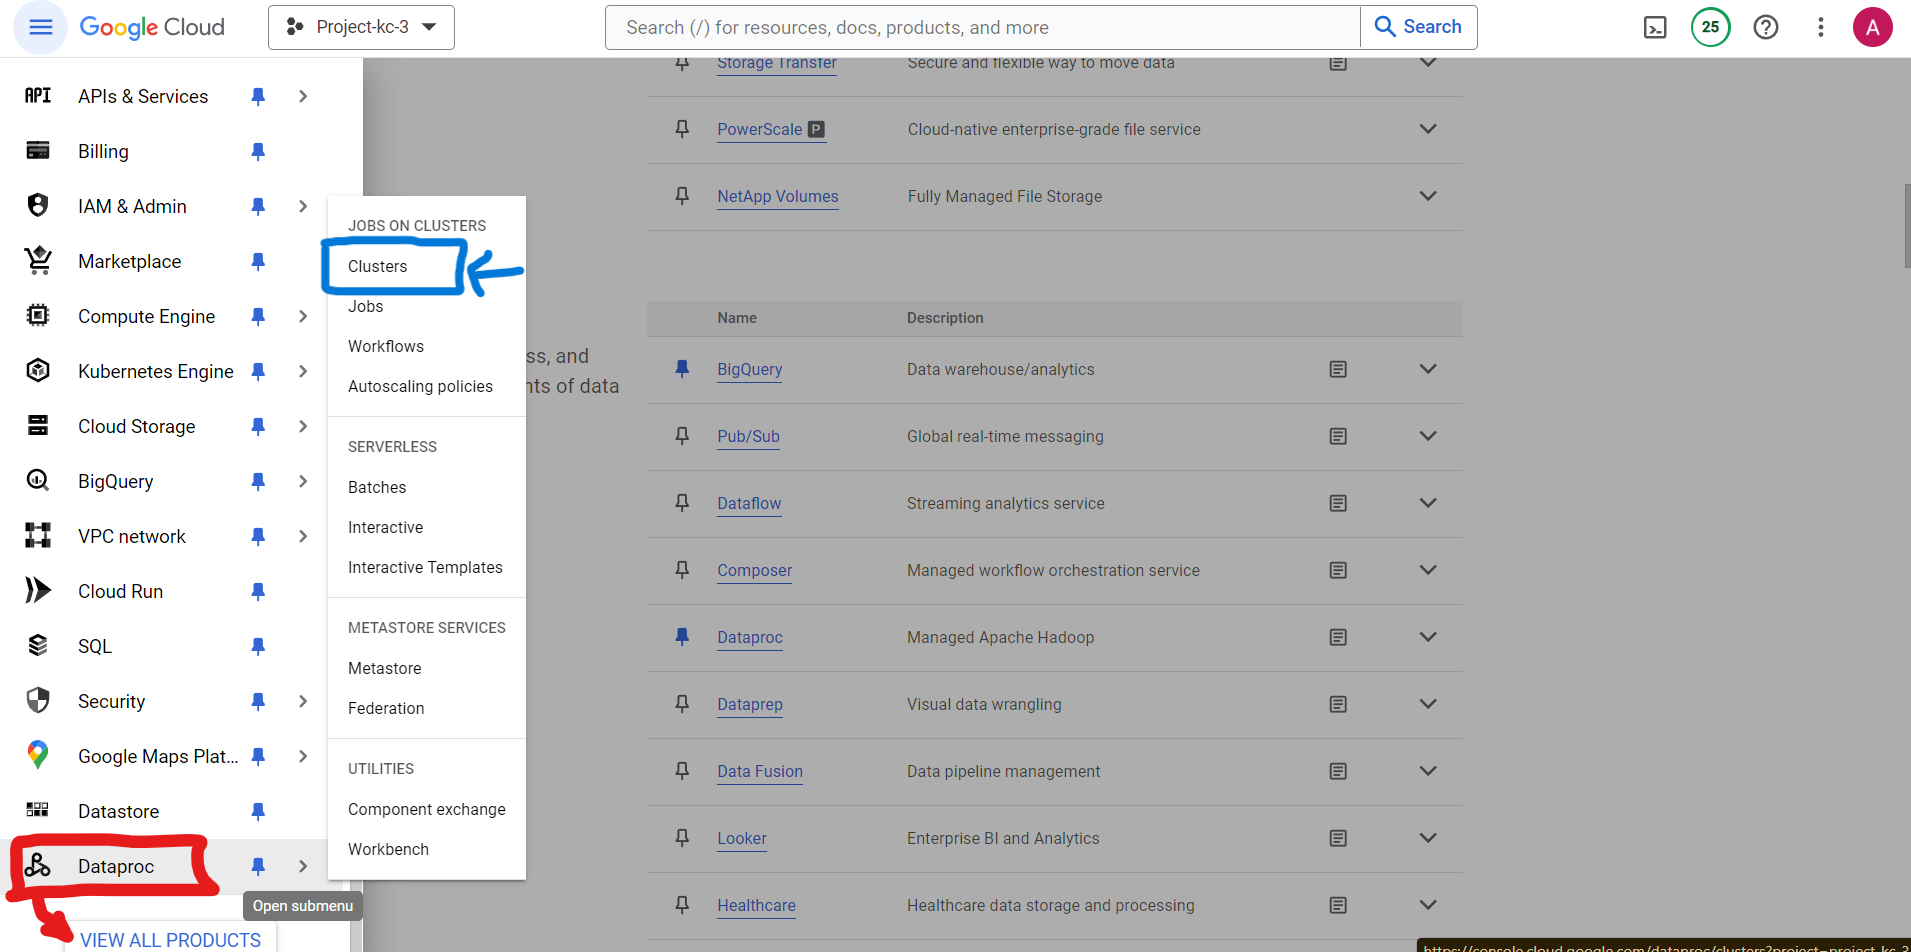

**!!**  Si es la **primera vez** que vamos a **crear un Cluster Dataproc**, nos pedirá habilitar la API (Enable)

3- **Crear cluster**

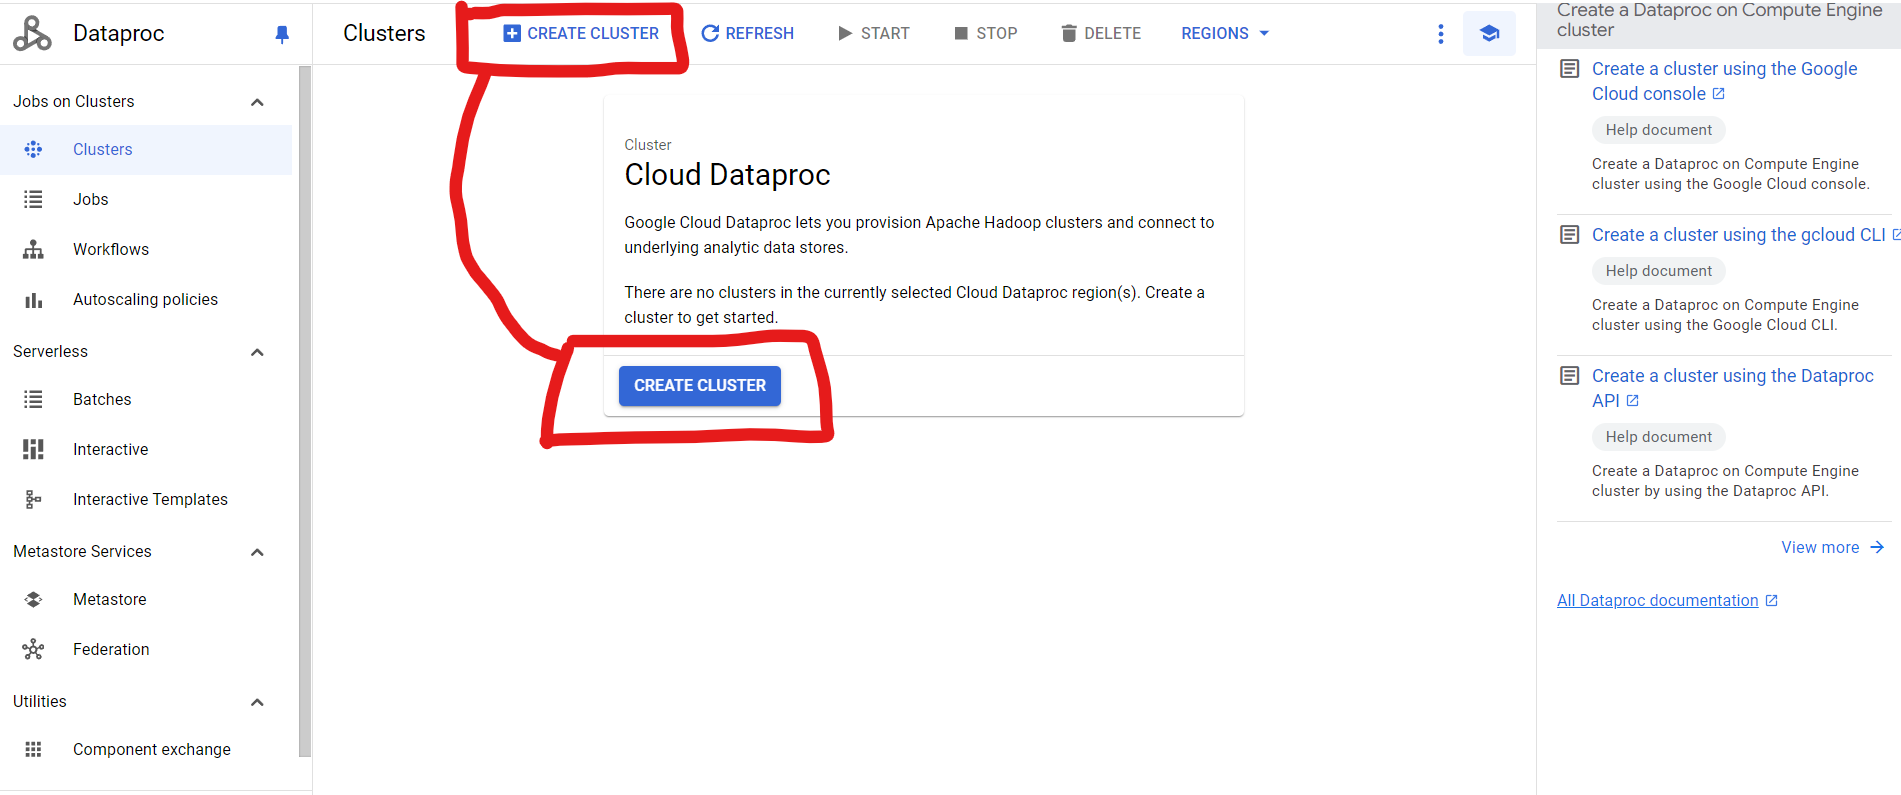

**Atención!** Al crear el cluster Dataproc nos da dos opciones: **"Cluster en Compute Engine"** y "Cluster en GKE". Como todavía no conocemos Kubernetes, elegiremos la primera opción, **"Cluster en Compute Engine"**

4- **Configuración** del **Cluster**



  4.1- **Set up** cluster

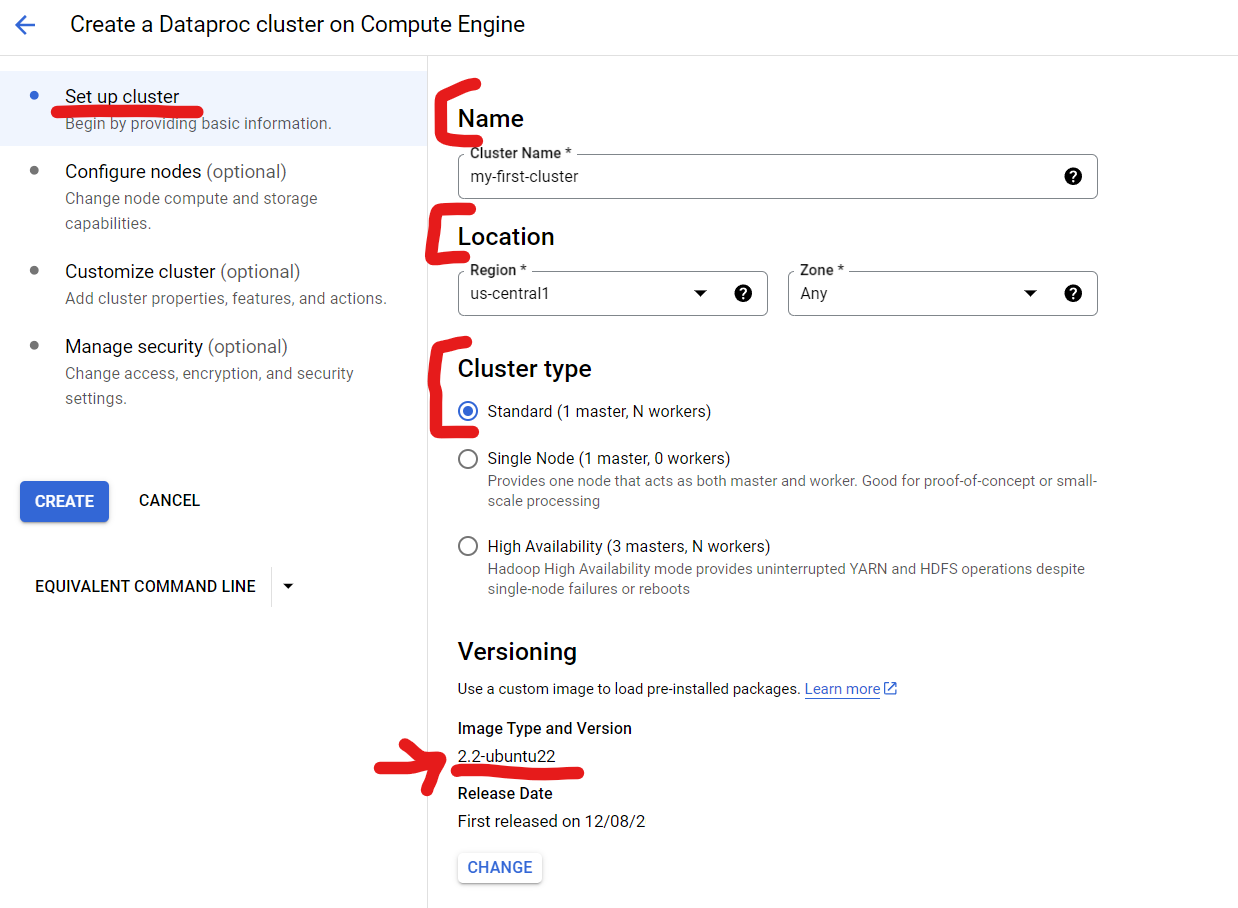

Por ahora en Set Up no hay que configurar nada más, aunque conviene echar un vistazo a las demás opciones.



  4.2- **Configure Nodes**
Aquí configuramos el tamaño del nodo master y de los workers (antiguamente esclavos, pero hoy está feo decirles así 😥)

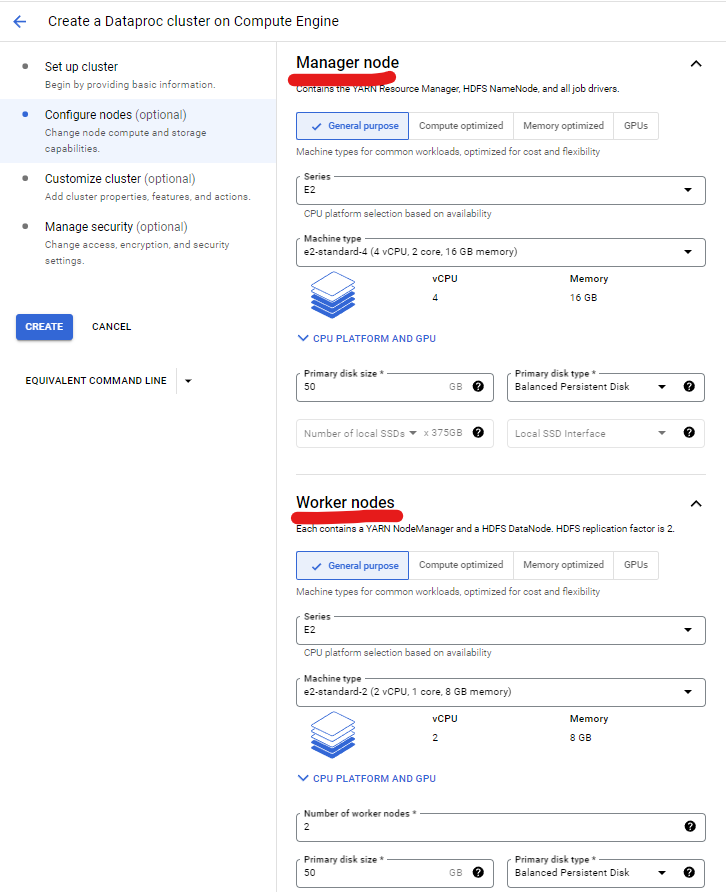

* Vamos a utilizar un tipo de máquinas que no sean muy potentes (más potencia, más caras). Cuál escoger vendrá determinado en función de los requierimientos y el presupuesto.
Con 50GB de disco en el **nodo principal** y en los **workers**, para nuestro trabajo es suficiente. En entornos laborales serán más grandes (y más caros!) Con 2 workers también nos vale por ahora.


4.3- **Customize cluster**

Aquí, es importante desmarcar la opción de **Internal IP only**
Podemos revisar las opciones de Customize cluster y Manage security, pero por ahora no hace falta modificar nada.
Private Google Access es una característica de Google Cloud que permite a las instancias de máquinas virtuales (VM) que solo tienen direcciones IP internas (sin direcciones IP externas) acceder a las direcciones IP externas de las API y servicios de Google.
Para los clusters de Dataproc en Google Cloud, Private Google Access permite que las instancias dentro del clúster, que no tienen direcciones IP externas, puedan acceder a las APIs y servicios de Google sin necesidad de una conexión a internet pública. Más info: https://cloud.google.com/vpc/docs/private-google-access?authuser=1&hl=en&_gl=1*1x0pwmj*_ga*MTcxODk5Mjc2NC4xNzEwMDE2NzYz*_ga_WH2QY8WWF5*MTcxNzg4MDM4NC4xNi4xLjE3MTc4ODMxNzAuNjAuMC4w&_ga=2.13464951.-1718992764.1710016763&_gac=1.146533958.1717880726.CjwKCAjwgpCzBhBhEiwAOSQWQaN4MHQnpXNg-Q4Oj2aQGfmaDRAssS7JcNM5Brs9A3GfuM1Xjx59kRoCF5cQAvD_BwE

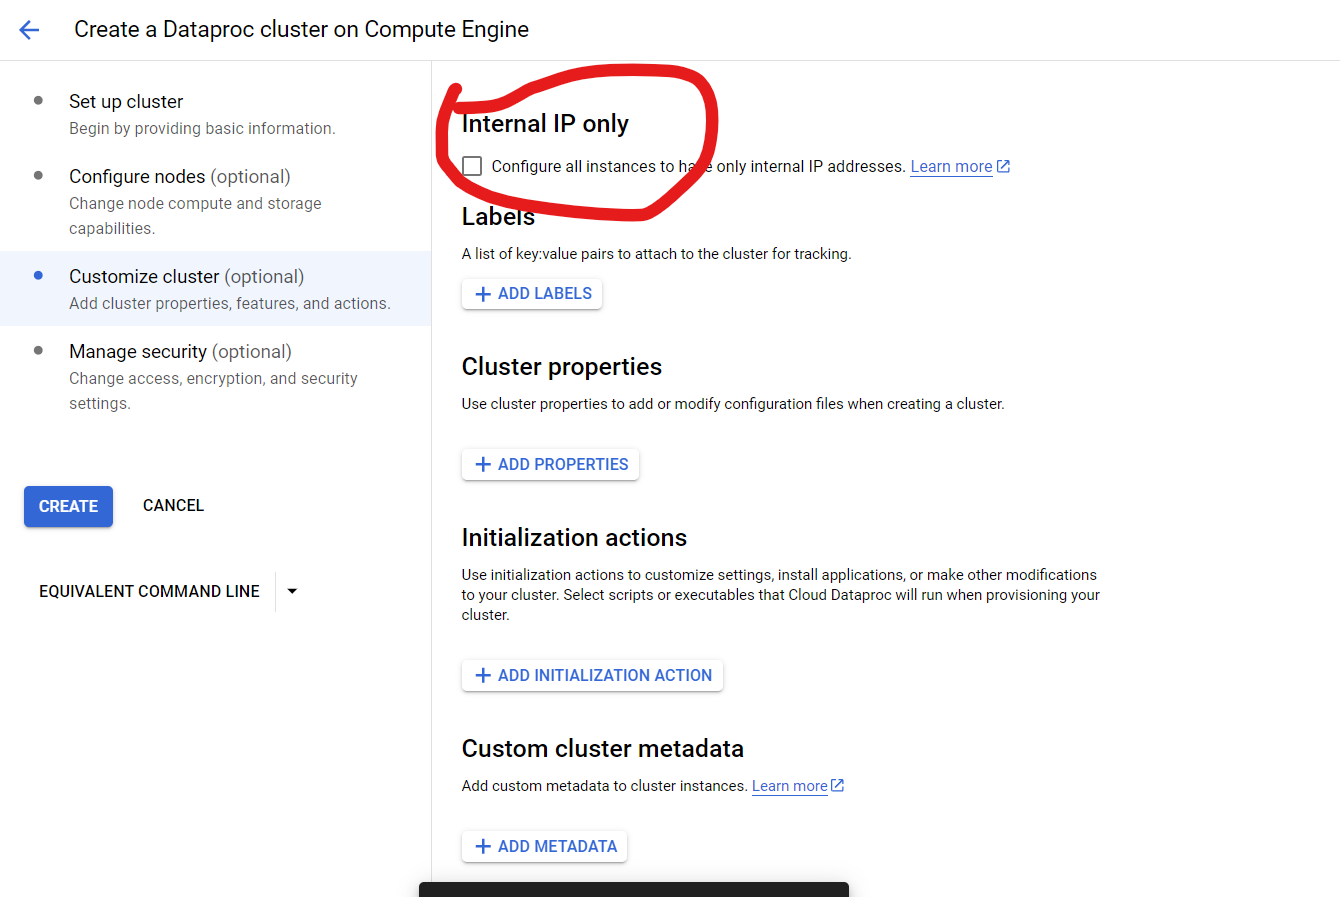


Si no, nos aparecerá un mensaje de error como este:

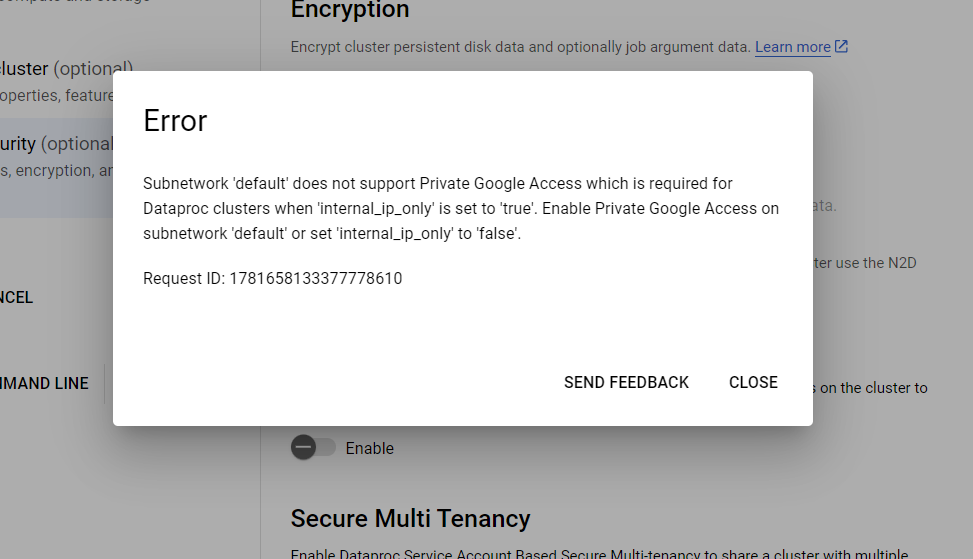


5- Una vez configurado, pulsamos **Crear**

### Un momento!

Ya hemos creado un cluster y nos está consumiendo crédito, así que tras usarlo y terminar de "jugar" con él, no olvidéis eliminarlo o apagarlo.

Una vez que ya hemos creado nuestro cluster, tarda un poco en aprovisionar y estar listo. Tras ello, en la ventana de Clusters aparecerá.

¿Y ahora? ¿Qué pasa una vez creado el cluster?
Si queremos acceder a él desde fuera, tendremos que decirle qué IPs pueden acceder y a qué puertos!

6- **Creación del Firewall**

Para ello, vayamos en el **Menú** a **VPC Networks**. Aquí es donde se encuentra la opción **Firewall**. Pero antes de crear las nuevas reglas, echemos un vistazo a las opciones que existen dentro de **VPC (Virtual Private Cloud) Networks** para entender un poco más:

*   **VPC (Virtual Private Cloud) Networks** en Google Cloud es un servicio que permite la **creación y gestión de redes privadas virtuales** dentro de la infraestructura de Google Cloud. Estas redes virtuales proporcionan un **entorno aislado y seguro** para desplegar, gestionar y conectar recursos como instancias de máquinas virtuales, contenedores y servicios.

###¿Para qué sirve una **VPC**?

*   **Aislamiento y Seguridad**: Proporciona un entorno aislado y seguro para tus recursos, controlando el acceso y el tráfico de red con reglas de firewall y políticas de seguridad
*   **Flexibilidad y Control**: Ofrece flexibilidad en la configuración de subredes, rangos de IP, reglas de firewall y rutas para satisfacer necesidades específicas de la red
*   **Escalabilidad**: Permite escalar recursos y desplegar aplicaciones en múltiples regiones con una red unificada y global
*   Interconexión y Peering: Facilita la interconexión de redes VPC y la compartición de recursos entre proyectos, mejorando la colaboración y la eficiencia operativa.

**Por ejemplo** -> Imagina que tienes una aplicación web distribuida en múltiples regiones. Puedes usar VPC Networks para crear una red privada global que abarque todas las regiones donde tienes desplegados tus recursos. Luego, puedes crear subredes específicas en cada región, configurar reglas de firewall para proteger tus instancias y utilizar rutas personalizadas para dirigir el tráfico entre diferentes componentes de tu aplicación.

###¿Cuáles son los componentes clave de una VPC?


*   **Red VPC**: Es el marco principal que contiene todos tus recursos de red. Imagina que es como un gran edificio que alberga todas tus oficinas (recursos).
*   **Subredes**: Dentro de la red, pueden existir varias subredes, cada una en una región específica y con su propio rango de direcciónes IP (los diferentes pisos o secciones del edificio).
*   **Firewall**: Como ya sabemos, las reglas de firewall son las que definen quién puede acceder a los recursos y qué tipo de tráfico está permitido.
*   **Rutas**: Las rutas determinan cómo se mueve el tráfico dentro de la red VPC y hacia afuera.
*   **VPC network Peering**: Esto nos permite conectar dos redes VPC de manera privada y directa, sin necesidad de pasar por la internet pública. (Como construir un tunel privado entre dos edificios por debajo de la calle).
*   **Shared VPC**: Esta opción, permite que varios proyectos de Google Cloud, puedan utilizar la misma red VPC. Esto nos sirve en organizaciones grandes donde diferentes equipos o departamentos requieren acceder a los mismos recursos de red.

###**¡Otra cosa!...** Acabamos de crear un **cluster Dataproc**, pero... nadie nos ha explicado exactamente para qué es esto, o, **¡qué es Dataproc!????**

Tenéis razón:

Dataproc es un **servicio administrado** de Google Cloud que facilita la **creación y gestión de clústeres de Hadoop y Spark** para el **procesamiento de grandes volúmenes de datos**.

Cuando creamos un clúster Dataproc, **dentro se despliega una red VPC**. Una red VPC que está pensada específicamente para manejar grandes volúmenes de datos con Hadoop y Spark.
Así que ya tenemos nuestra red VPC creada sin darnos cuenta.
Ahora, cuando creémos las reglas del firewall, estaremos controlando el acceso a los nodos del cluster Dataproc (o a los nodos de la red VPC).

Ahora sí, vamos a crear las reglas de firewall:

**NOTA:** Hadoop funciona en GC a través de los puertos **8088 y 9870**

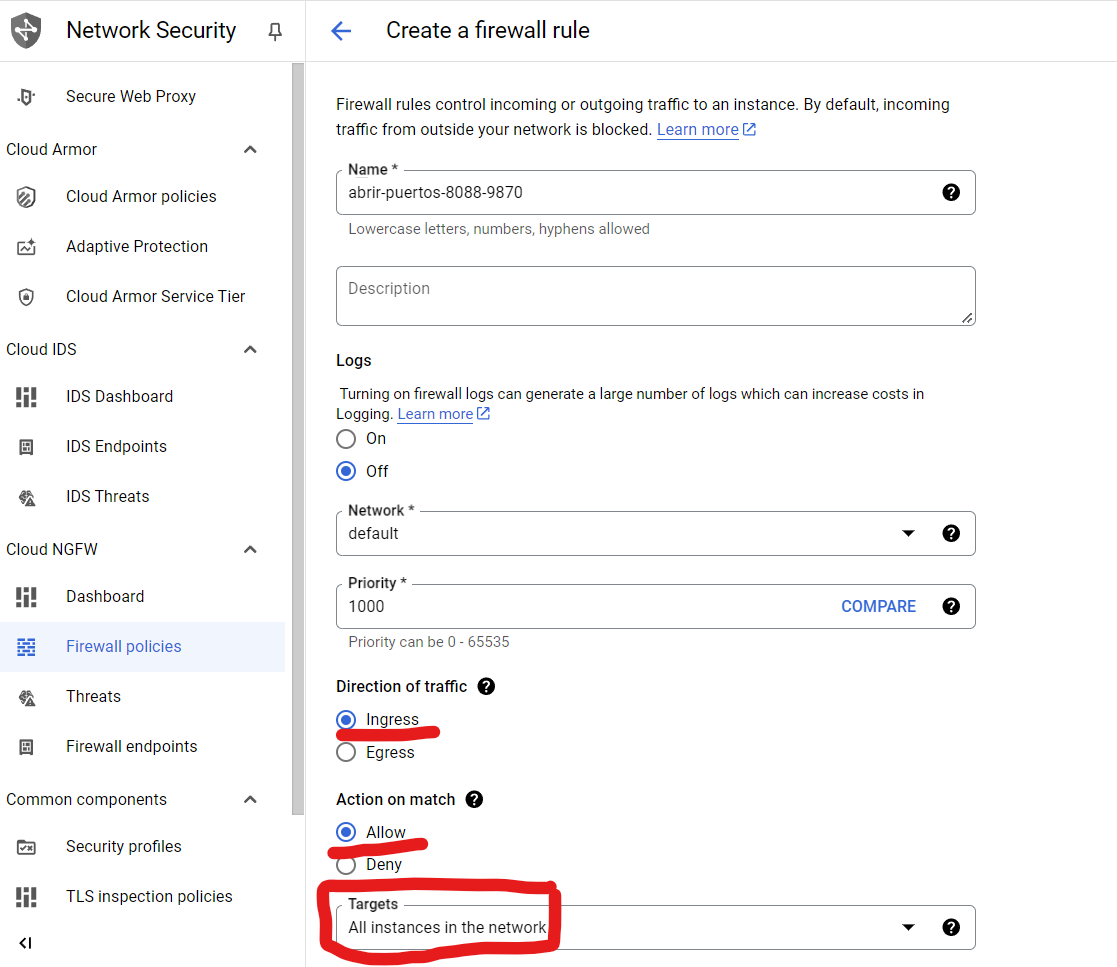

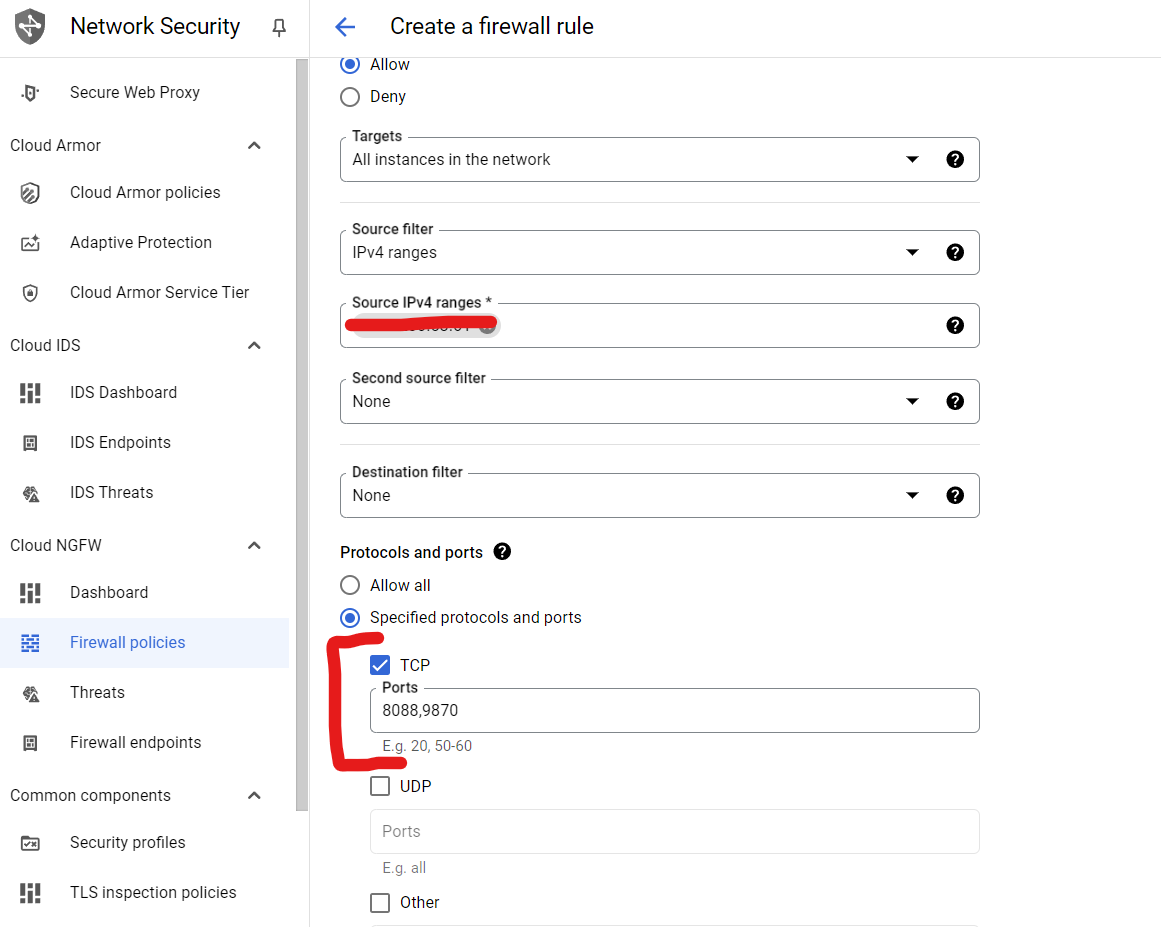


7- Ahora, **busquemos la IP del nodo maestro**

Para ello, vamos a **Dataproc** -> **Clusters** y seleccionamos nuestro cluster.
En él vamos a ver información de monitoreo, configuración, etc. Hagamos click en **VM Instances**:

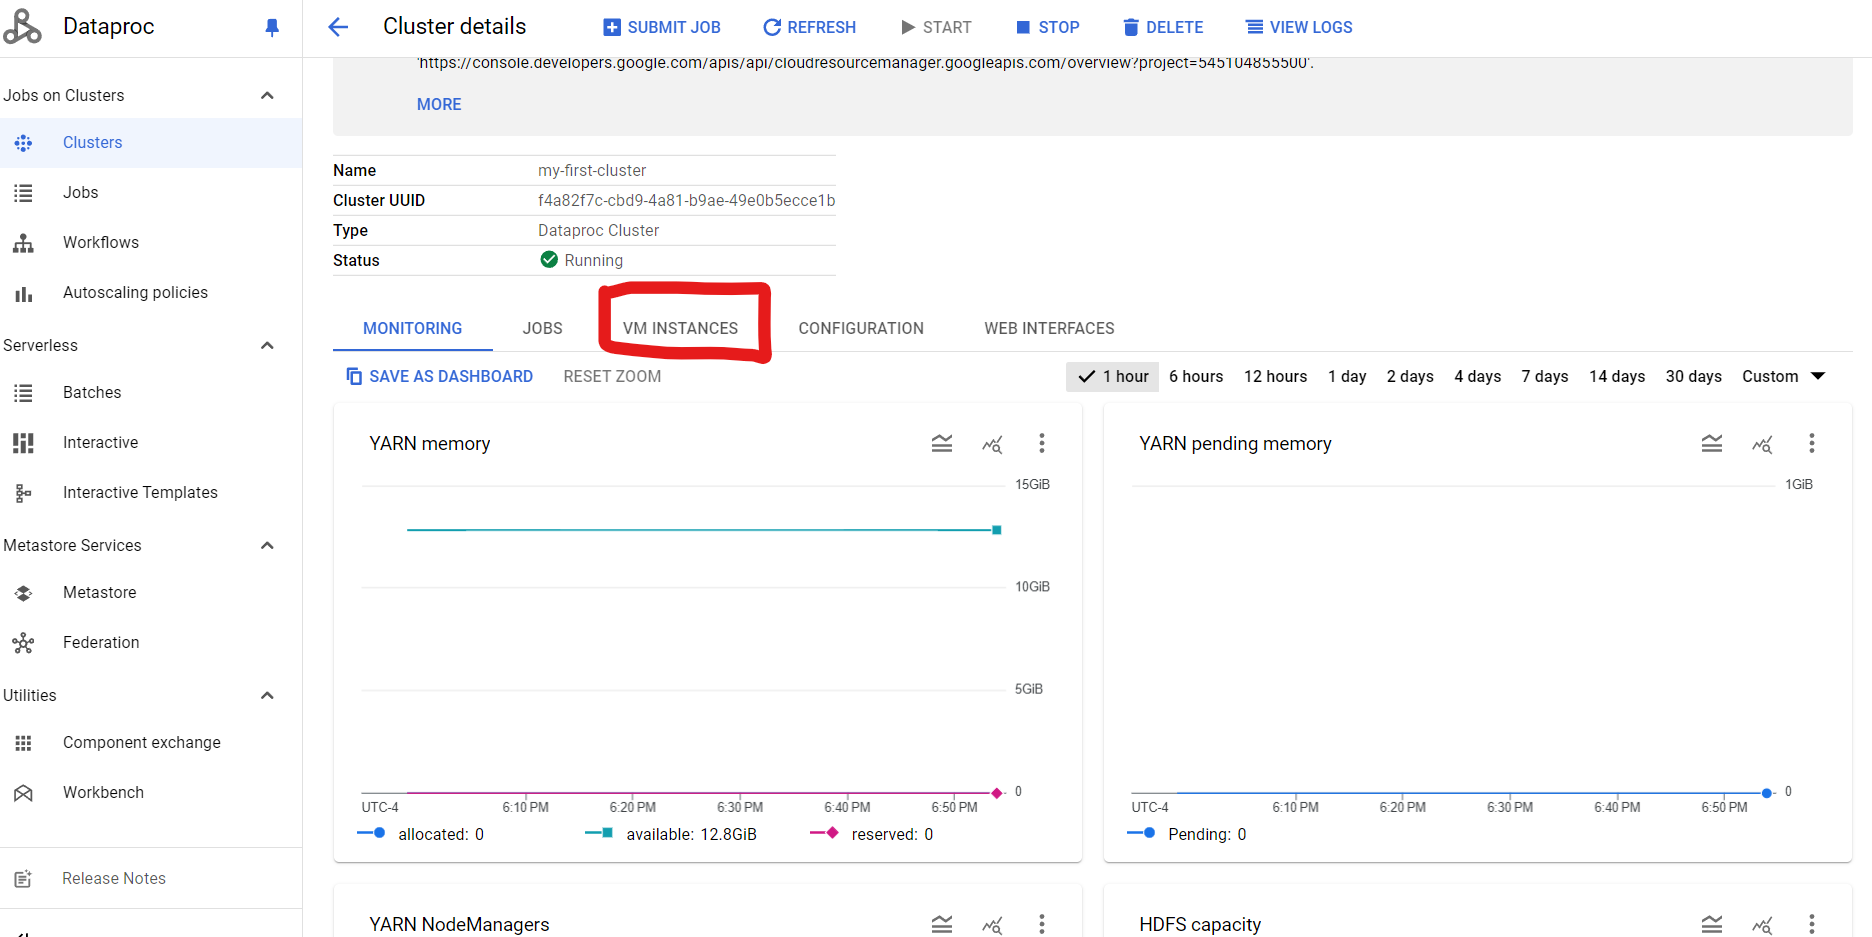

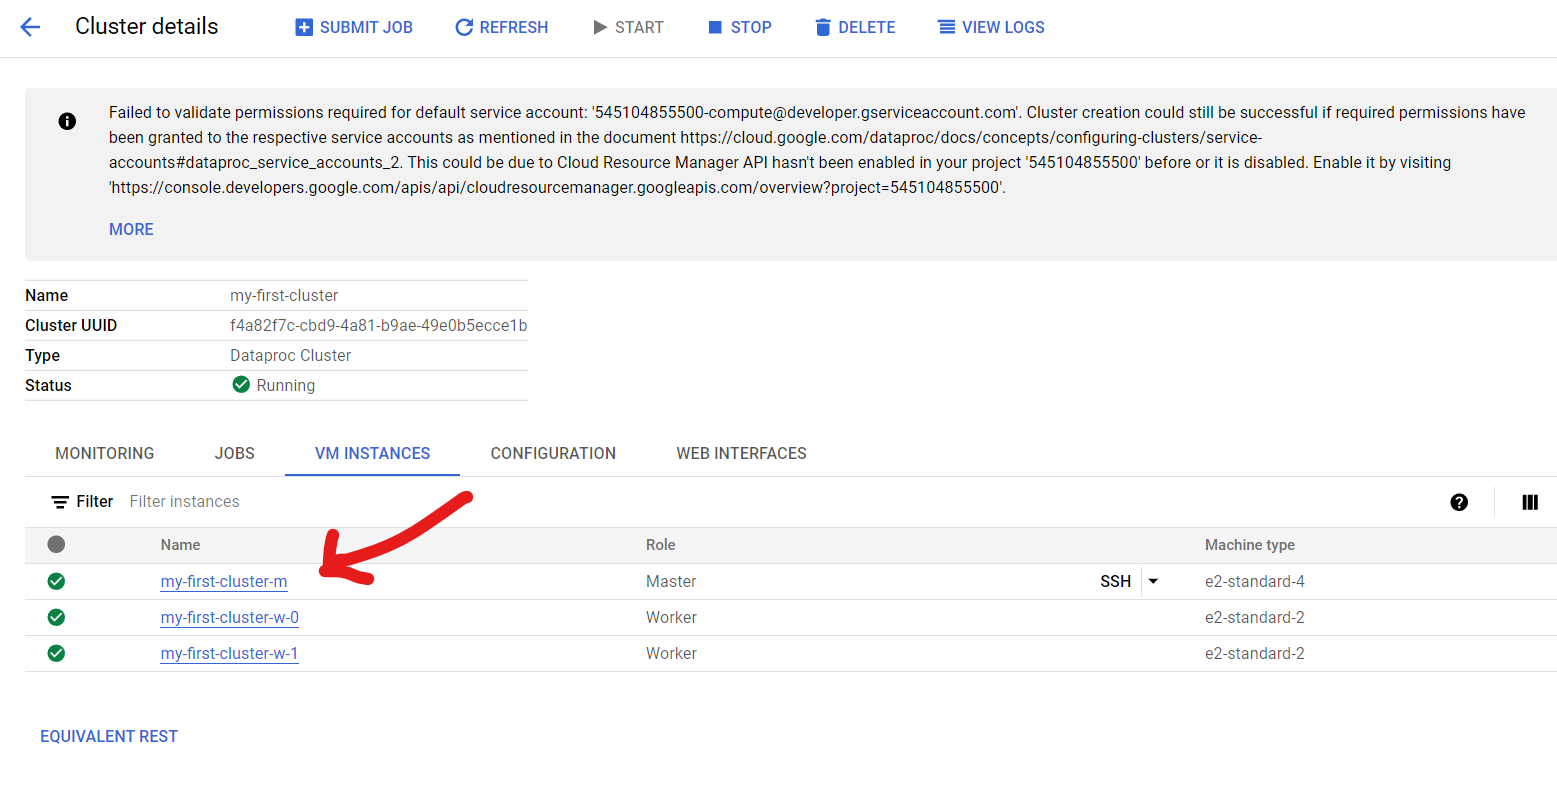


Al hacer click en el nodo maestro, nos lleva a ver las opciones de está VM (Finalmente este cluster, no es más que una serie de máquinas virtuales, en nuestro caso una maestra y dos workers, configuradas para el propósito de Hadoop).
Al igual que cuando creamos una máquina virtual para instalar un Mongo o cualquier otra cosa, esta máquina tiene una IP.

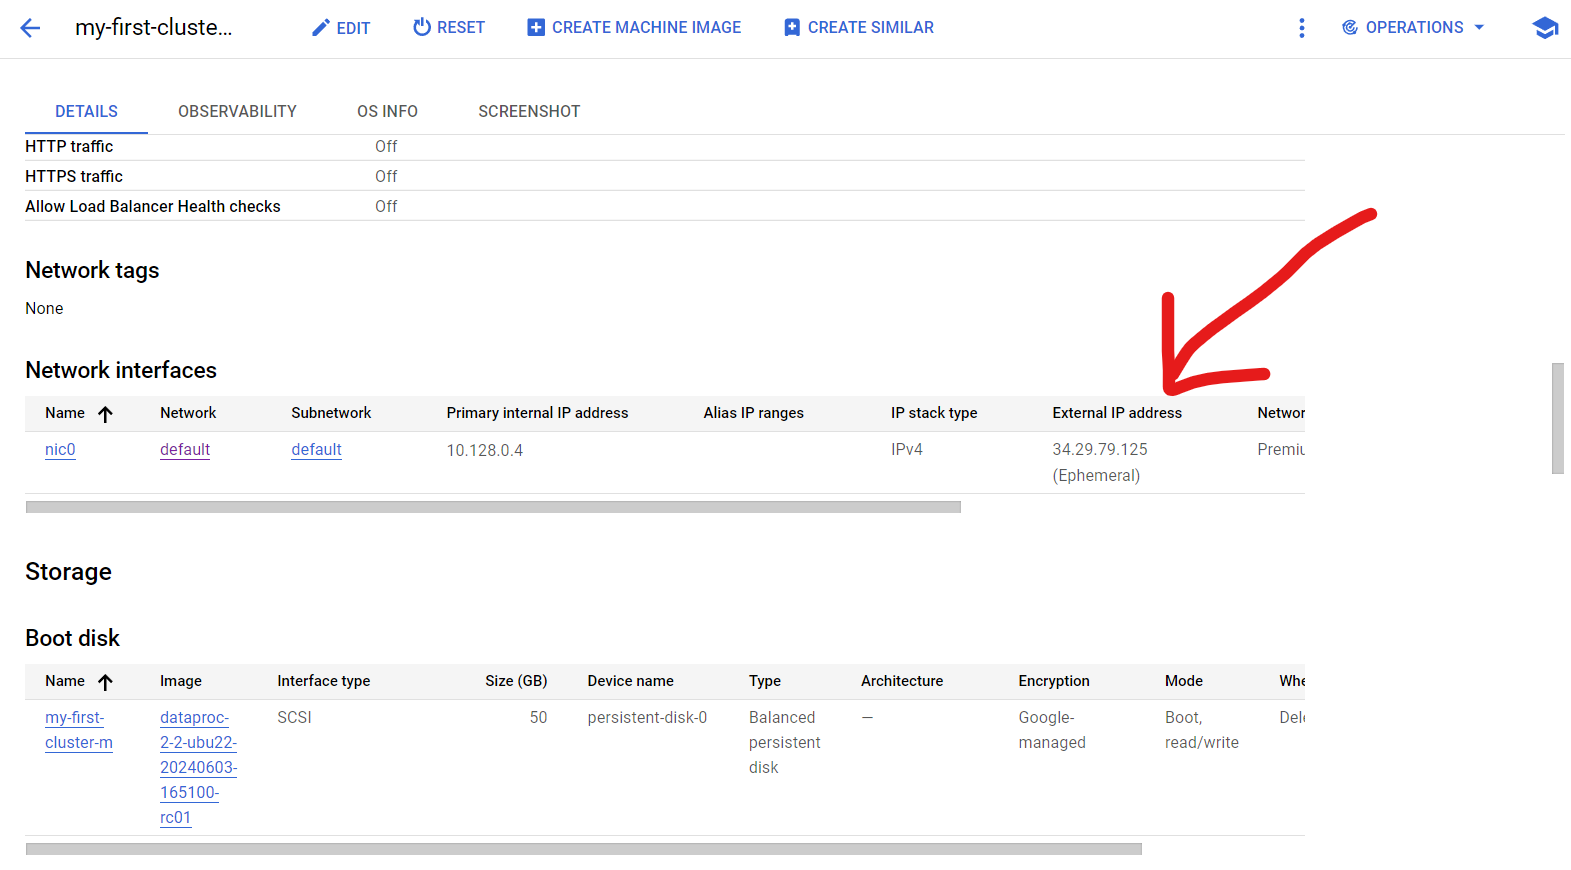


Copiemos la IP y desde el navegador:

8- **Accedamos al dashboard de YARN**: http://IP:8088

Et voila!

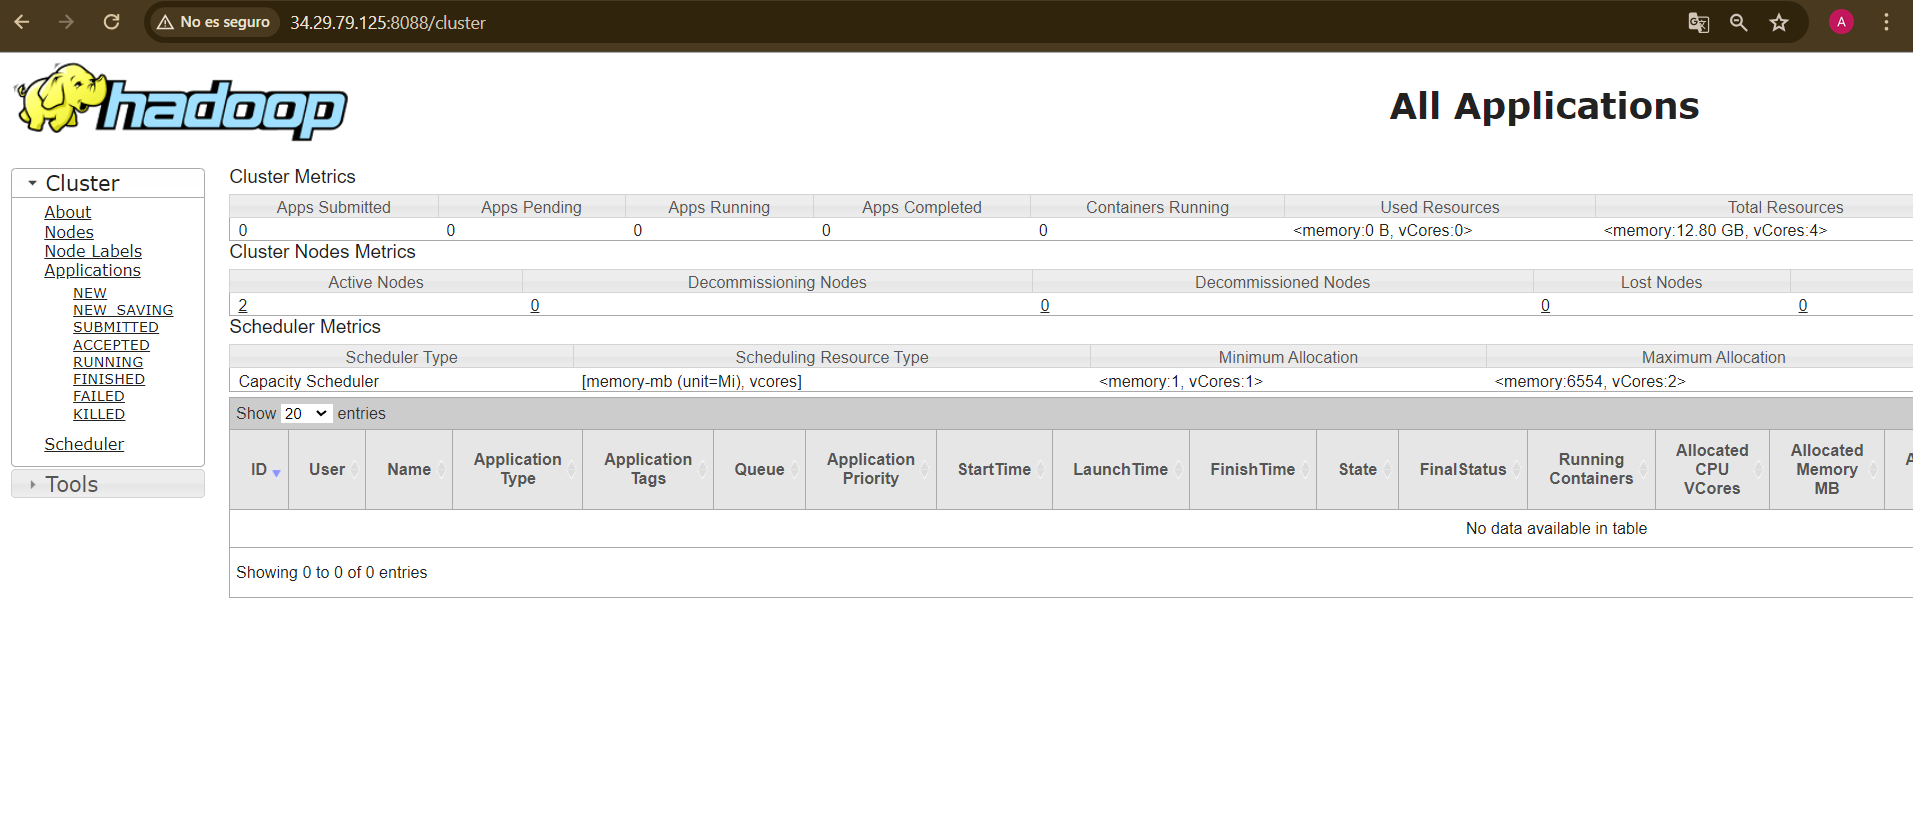


### ¿Y si queremos entrar a la máquina diréctamente?

Pues hacemos **click en SSH** y se nos abrirá la consola:

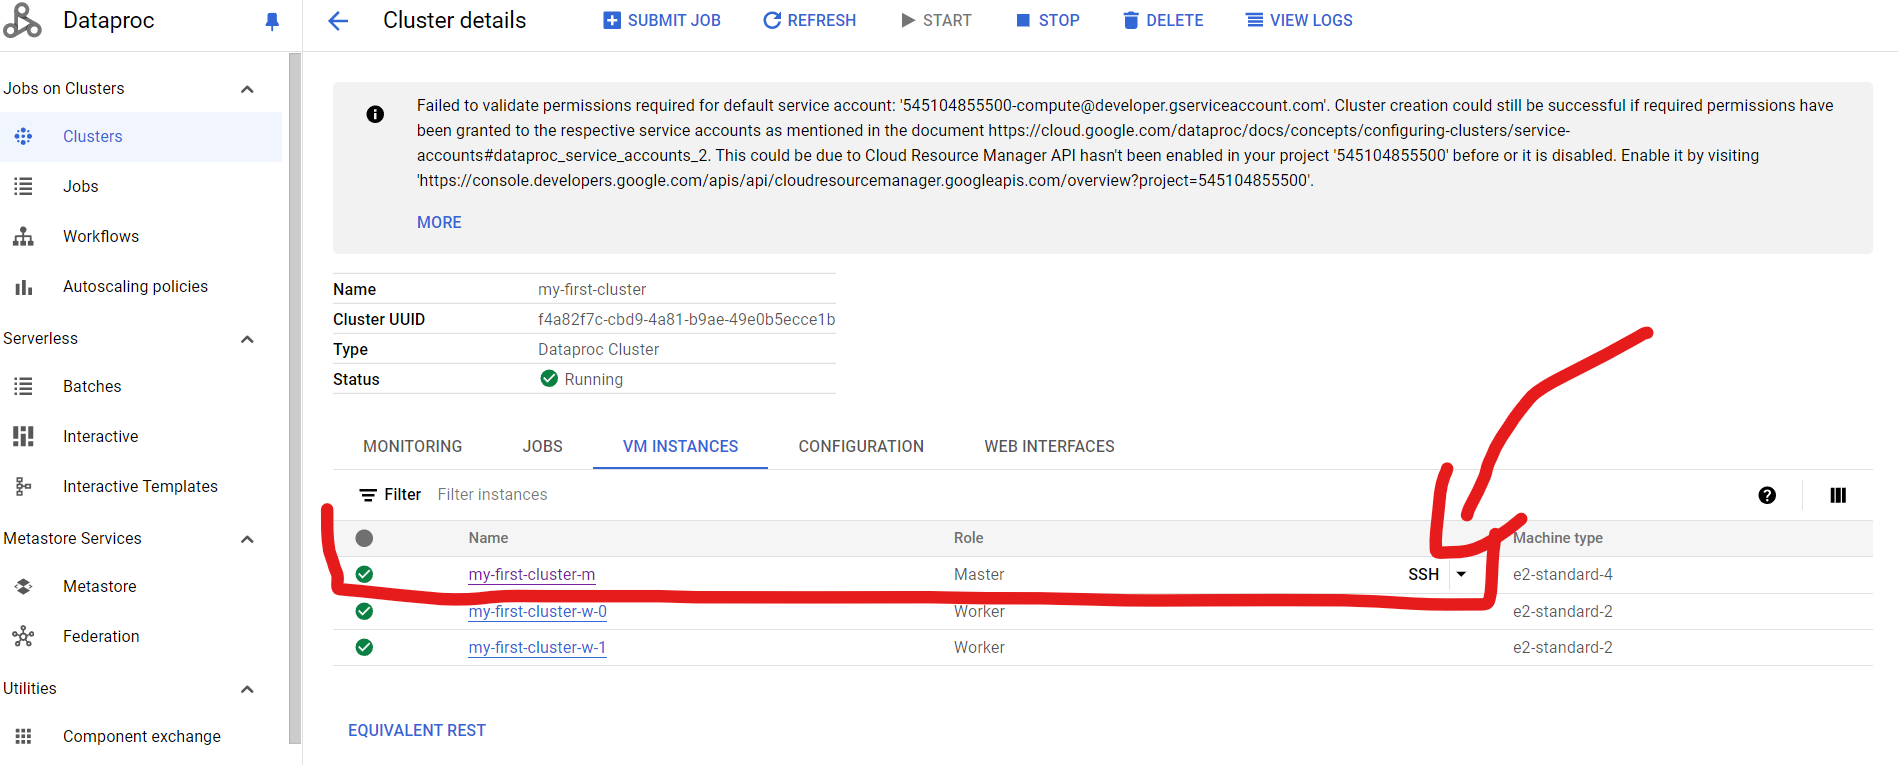

Aquí estamos dentro de la máquina maestra del cluster:

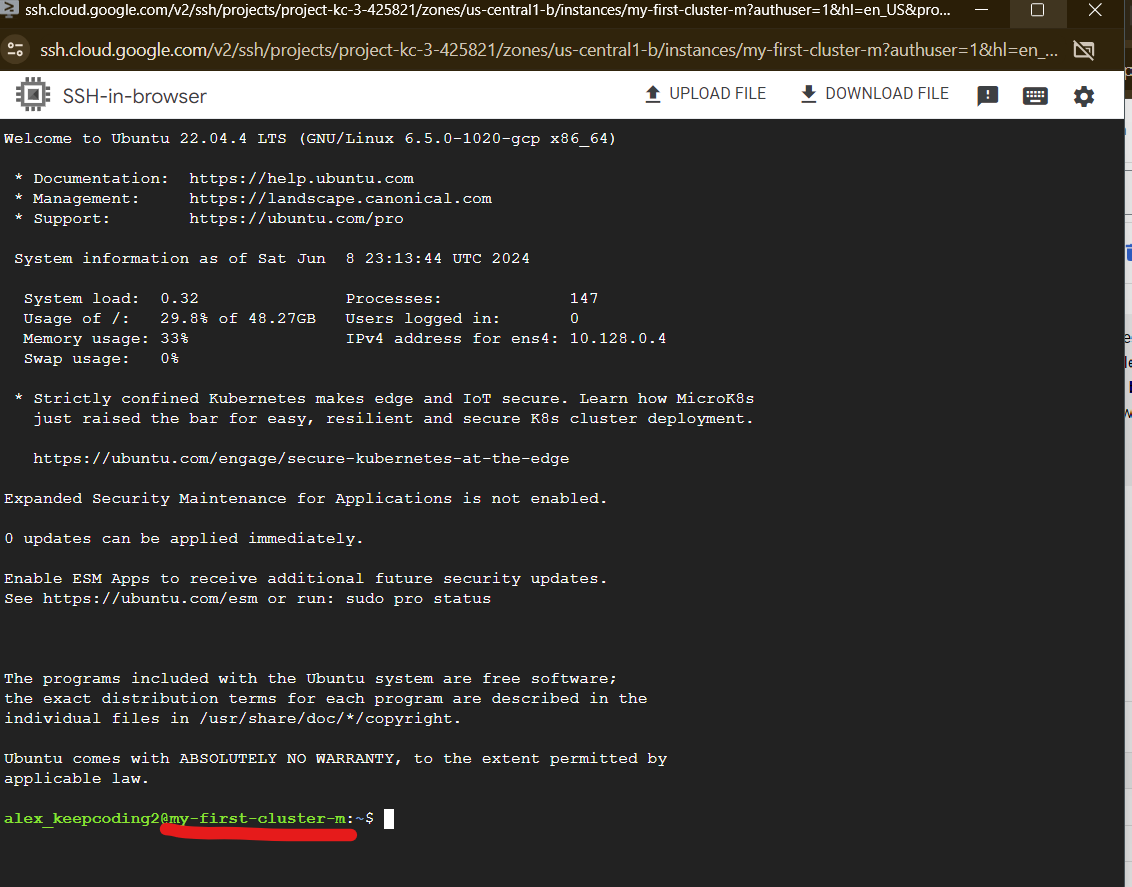


Una vez que estamos dentro con la **shell**, tenemos que tener en cuenta que esta instalación de Hadoop está hecha por el **equipo de Google** y no todos los archivos se encuentran en el mismo lugar (nos referimos a los archivos de instalación y configuración de todas las utilidades de Hadoop).

Vamos a **ejecutar un ejemplo de trabajo de MapReduce en Hadoop**, específicamente el **cálculo de PI** que viene pre-empaquetado en los ficheros de instalación de Hadoop.

1- Vayamos por ejemplo al directorio que contiene los archivos `.jar` de ejemplo de Hadoop:

```
cd /usr/lib/hadoop-mapreduce
```

**NOTA:**   Al estar la máquina ya aprovisionada no tenemos que ocuparnos de arrancar servicios, a menos que querramos arrancar servicios extra.

2- Ejecutemos el comando para calcular PI:

```
 yarn jar hadoop-mapreduce-examples.jar pi 200 200
```

**yarn**: gestor de recursos de Hadoop que maneja la ejecución de trabajos.
**jar**: indicamos a yarn que vamos a ejecutar un archivo JAR.
**pi**: es el nombre del ejemplo específico que queremos ejecutar.
**200 200**: Parámetros de ejempo. Le estamos diciendo el número de tareas Map a ejecutar con el primer 200 y el número de muestras por tarea en el segundo.

Revisemos ahora los detalles del trabajo que se está ejecutando en el navegador:

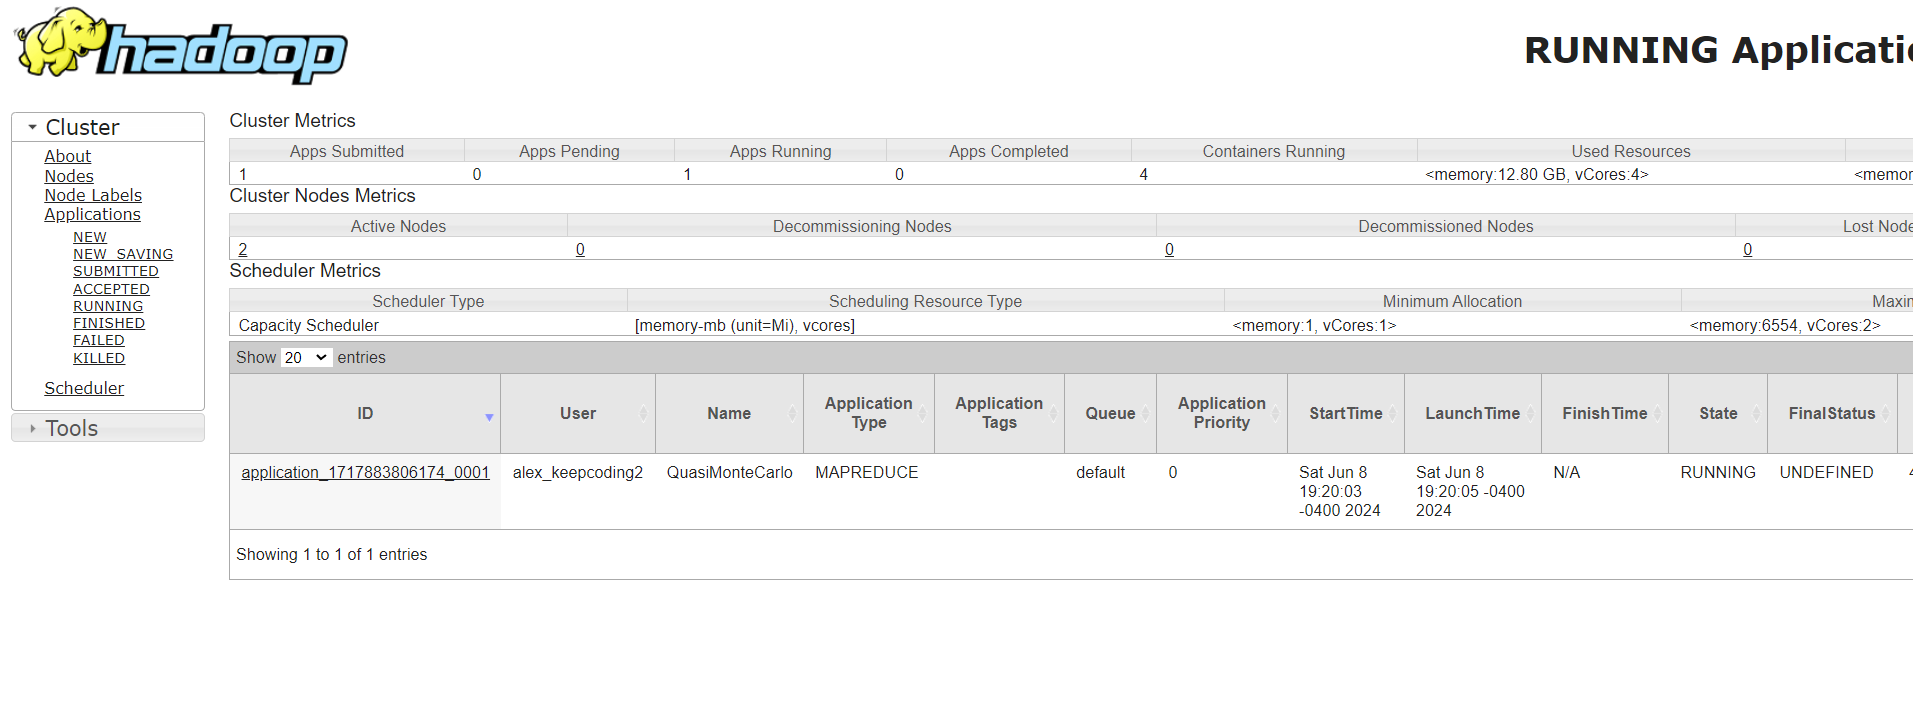

Veamos la ejecución completa, lleva un rato. A mejores máquinas, más potencia de cálculo y más nodos worker, más rápido será el procesamiento (y más caro).

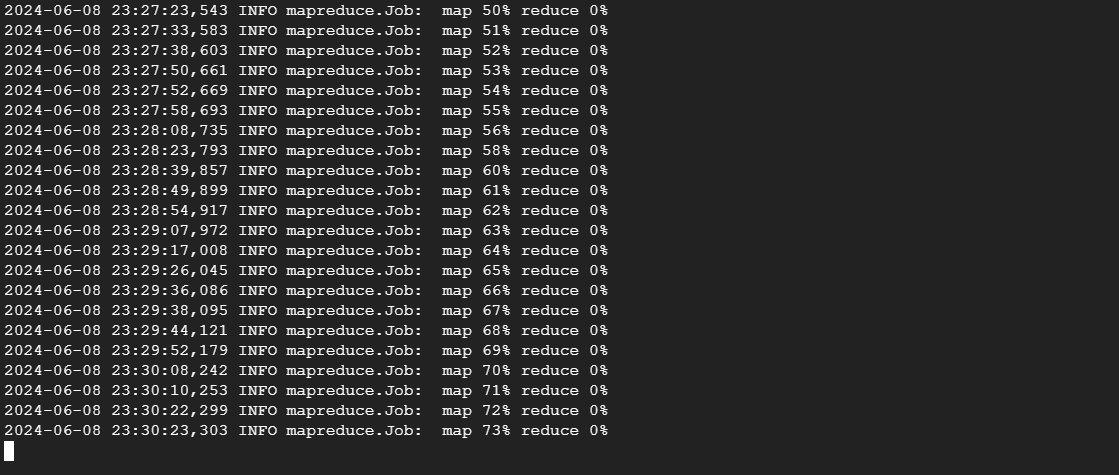



Como resumen, en este notebook hemos aprendido:


*   Qué es Hadoop y todos sus componentes
*   Crear y configurar un cluster Dataproc, que contiene Hadoop pre configurado
*   Hemos entendido qué son las VPC Networks y para qué sirven
*   Hemos conocido la consola de YARN, para manejar todos los procesos
*   Terminamos mandando una tarea a Map Reduce!




